##### Aldo Daniel Villaseñor Fierro
##### A01637907

In [2]:
import pandas as pd
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
df=pd.read_csv('mc-donalds-menu-1.csv',encoding = 'unicode_escape', engine ='python')
df_car = df['Carbohydrates']
df_sug = df['Sugars']

### Transformación Box-Cox. Utilizando el modelo exacto y el aproximado de acuerdo con las sugerencias de Box y Cox para la transformación

In [4]:
bc_e_car = stats.boxcox(df_car+1)[0]
lbd_car = stats.boxcox(df_car+1)[1]
bc_a_car = np.sqrt(df_car+1)

bc_e_sug = stats.boxcox(df_sug+1)[0]
lbd_sug = stats.boxcox(df_sug+1)[1]
bc_a_sug = np.log(df_sug+1)

In [5]:
lbd_sug

0.24953722040418788

##### Ecuación modelo exacto $\frac{x^{\lambda }-1}{\lambda }$
##### Ecuación modelo aproximado $\sqrt{x+1}$ Carbohidratos
##### Ecuación modelo aproximado $\log(x+1)$ Azúcares

In [6]:
def summary(data):
    minimum = np.min(data)
    print(f"Mínimo: {minimum}")
    maximum = np.max(data)
    print(f"Máximo: {maximum}")
    mean = np.mean(data)
    print(f"Media: {mean}")
    median = np.median(data)
    print(f"Mediana: {median}")
    q1 = np.percentile(data, 25)
    print(f"Quartile 1: {q1}")
    q3 = np.percentile(data, 75)
    print(f"Quartile 3: {q3}")
    bias = stats.skew(data)
    print(f"Sesgo: {bias}")
    kurtosis = stats.kurtosis(data)
    print(f"Curtosis: {kurtosis}")
    _, p_value = stats.jarque_bera(data)
    print(f"Jarque-Bera Test P-value: {p_value}")

In [7]:
def lambda_yj(data, n):
    d = []
    for i in range(len(n)):
        t = stats.yeojohnson(data,lmbda=n[i])[0]
        _, p_value = stats.jarque_bera(t)
        d.append(p_value)
    return d



##### Comparación de las medidas: Mínimo, máximo, media, mediana, cuartil 1 y cuartil 3, sesgo , curtosis y pruebas de normalidad (Jarque-Bera).

##### Variable Carbohidratos

In [8]:
summary(bc_e_car)

Mínimo: 0.0
Máximo: 36.256909136076175
Media: 16.469945113367718
Mediana: 16.48025221859432
Quartile 1: 12.631144863415434
Quartile 3: 20.38466172742037
Sesgo: -0.027311524877722246
Curtosis: 0.6536832896137161
Jarque-Bera Test P-value: 0.0972263769002522


In [9]:
summary(bc_e_sug)

Mínimo: 0.0
Máximo: 9.467786039513516
Media: 4.399268940960248
Mediana: 4.291881801597276
Quartile 1: 2.44364818025886
Quartile 3: 6.576135028201798
Sesgo: -0.12912872120436655
Curtosis: -1.0911225842710042
Jarque-Bera Test P-value: 0.001102605512226474


In [10]:
summary(bc_a_car)

Mínimo: 1.0
Máximo: 11.916375287812984
Media: 6.583243626224498
Mediana: 6.708203932499369
Quartile 1: 5.5677643628300215
Quartile 3: 7.810249675906654
Sesgo: -0.4968261704731906
Curtosis: 0.9394753355206875
Jarque-Bera Test P-value: 3.990759356623e-05


##### Variable Azúcares

In [11]:
summary(bc_a_sug)

Mínimo: 0.0
Máximo: 4.859812404361672
Media: 2.75678572260527
Mediana: 2.9174053685313024
Quartile 1: 1.9073724790984987
Quartile 3: 3.8918202981106265
Sesgo: -0.5991583261765885
Curtosis: -0.6511919580674923
Jarque-Bera Test P-value: 4.211634865987942e-05


In [12]:
summary(df_car)

Mínimo: 0
Máximo: 141
Media: 47.34615384615385
Mediana: 44.0
Quartile 1: 30.0
Quartile 3: 60.0
Sesgo: 0.9074252822561677
Curtosis: 1.3575379316182001
Jarque-Bera Test P-value: 8.25154607719961e-13


In [13]:
summary(df_sug)

Mínimo: 0
Máximo: 128
Media: 29.423076923076923
Mediana: 17.5
Quartile 1: 5.75
Quartile 3: 48.0
Sesgo: 1.025977207076316
Curtosis: 0.48774420501021654
Jarque-Bera Test P-value: 3.431078580921219e-11


##### Histograma de variable Carbohidratos y sus tranformaciones

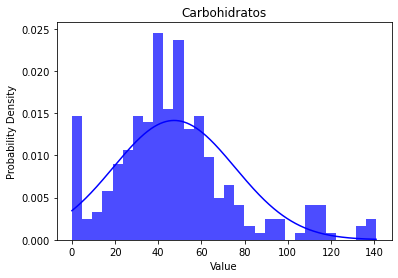

In [14]:
x = np.arange(min(df_car), max(df_car), 0.1)

serie=df_car
x = np.arange(min(serie), max(serie), 0.1)
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos')
plt.show()

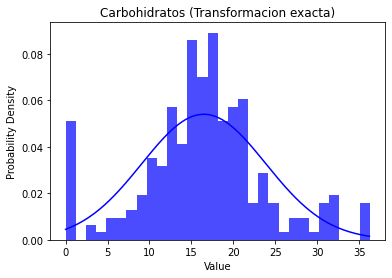

In [48]:
x = np.arange(min(bc_e_car), max(bc_e_car), 0.1)

serie=bc_e_car
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos (Transformacion exacta)')
plt.show()


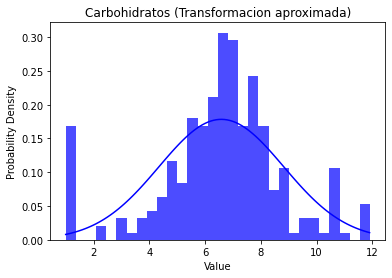

In [50]:
x = np.arange(min(bc_a_car), max(bc_a_car), 0.1)
serie=bc_a_car
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos (Transformacion aproximada)')
plt.show()


##### Histograma de variable Azúcares y sus tranformaciones

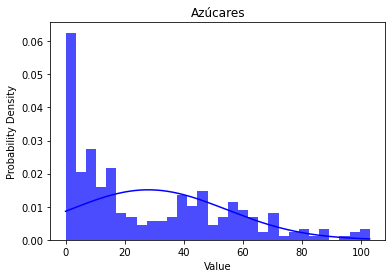

In [51]:
x = np.arange(min(df_sug), max(df_sug), 0.1)
serie=df_sug
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Azúcares')
plt.show()

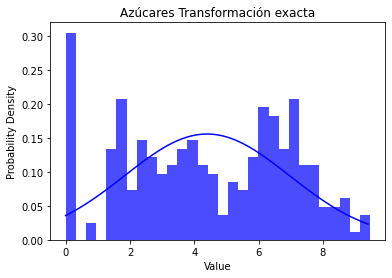

In [52]:
x = np.arange(min(bc_e_sug), max(bc_e_sug), 0.1)
serie=bc_e_sug
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Azúcares Transformación exacta')
plt.show()

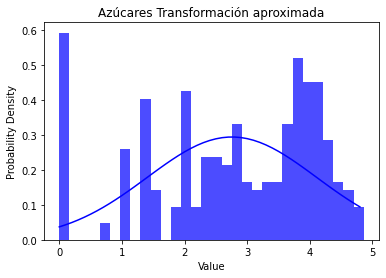

In [53]:
x = np.arange(min(bc_a_sug), max(bc_a_sug), 0.1)
serie=bc_a_sug
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Azúcares Transformación aproximada')
plt.show()

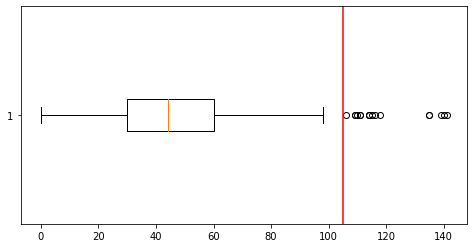

In [20]:
q1_car = np.percentile(df['Carbohydrates'], 25)  
q3_car = np.percentile(df['Carbohydrates'], 75)  
ri_car = q3_car - q1_car

plt.figure(figsize=(8, 4))
plt.boxplot(df['Carbohydrates'], vert=False)
plt.axvline(x=q3_car + 1.5 * ri_car, color="red")
plt.show()

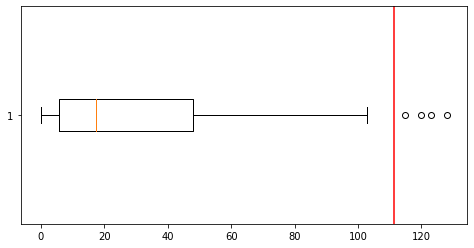

In [21]:
q1_sug = np.percentile(df_sug, 25)  
q3_sug = np.percentile(df_sug, 75)  
ri_sug = q3_sug - q1_sug

plt.figure(figsize=(8, 4))
plt.boxplot(df_sug, vert=False)
plt.axvline(x=q3_sug + 1.5 * ri_sug, color="red")
plt.show()

##### Detección de anomalías y corrección de base de datos (datos atípicos, ceros anámalos, etc).

##### Eliminando datos atípicos 

In [22]:
df_car = df_car[(df_car > 0) * (df_car < (q3_car + 1.5 * ri_car))]
df_sug = df_sug[df_sug < (q3_sug + 1.5 * ri_sug)]

In [23]:
y

array([0.03705954, 0.04295781, 0.04952388, 0.05678288, 0.06475161,
       0.07343685, 0.08283384, 0.09292485, 0.10367792, 0.11504586,
       0.12696559, 0.13935784, 0.15212728, 0.16516313, 0.17834027,
       0.19152085, 0.20455638, 0.21729028, 0.2295609 , 0.24120474,
       0.25206008, 0.26197065, 0.27078931, 0.27838172, 0.28462972,
       0.28943436, 0.29271855, 0.29442909, 0.29453813, 0.29304387,
       0.28997068, 0.28536837, 0.27931092, 0.27189443, 0.26323464,
       0.25346388, 0.24272775, 0.23118152, 0.21898638, 0.20630579,
       0.19330187, 0.18013206, 0.16694611, 0.15388344, 0.14107102,
       0.12862164, 0.11663277, 0.10518589, 0.09434625])

In [24]:
yj_e_car = stats.yeojohnson(df_car)[0]
lbd_car = stats.yeojohnson(df_car)[1]
yj_a_car = df_car

yj_e_sug = stats.yeojohnson(df_sug+1)[0]
lbd_sug = stats.yeojohnson(df_sug+1)[1]
yj_a_sug = np.log(df_sug+1)

In [25]:
lbd_car

0.7568004683324302

In [26]:
lbd_sug

0.21214599033517836

##### Ecuación modelo exacto $\frac{x^{\lambda }-1}{\lambda }$
##### Ecuación modelo aproximado $x$ Carbohidratos
##### Ecuación modelo aproximado $\log(x+1)$ Azúcares

##### Comparación de las medidas: Mínimo, máximo, media, mediana, cuartil 1 y cuartil 3, sesgo , curtosis y pruebas de normalidad (Jarque-Bera).

##### Variable Carbohidratos

In [27]:
summary(df_car)

Mínimo: 4
Máximo: 98
Media: 45.25550660792952
Mediana: 44.0
Quartile 1: 32.0
Quartile 3: 57.0
Sesgo: 0.30341010149795117
Curtosis: 0.0527011555014405
Jarque-Bera Test P-value: 0.17298342933710809


In [28]:
summary(yj_e_car)

Mínimo: 3.1454778571712803
Máximo: 41.466083279202955
Media: 22.349729138292975
Mediana: 22.238394216596692
Quartile 1: 17.30941193026987
Quartile 3: 27.227045523404744
Sesgo: -0.013570988992208934
Curtosis: 0.005969859217465512
Jarque-Bera Test P-value: 0.9963542028518314


In [29]:
summary(yj_a_car)

Mínimo: 4
Máximo: 98
Media: 45.25550660792952
Mediana: 44.0
Quartile 1: 32.0
Quartile 3: 57.0
Sesgo: 0.30341010149795117
Curtosis: 0.0527011555014405
Jarque-Bera Test P-value: 0.17298342933710809


##### Variable Azúcares

In [30]:
summary(df_sug)

Mínimo: 0
Máximo: 103
Media: 27.984375
Mediana: 17.0
Quartile 1: 5.0
Quartile 3: 46.25
Sesgo: 0.8232604321948835
Curtosis: -0.29353600456904516
Jarque-Bera Test P-value: 3.3192067459250874e-07


In [31]:
summary(yj_e_sug)

Mínimo: 0.746702884908654
Máximo: 7.938066645152998
Media: 4.198159973887773
Mediana: 4.0896078619553595
Quartile 1: 2.40904166135192
Quartile 3: 6.0140353692381545
Sesgo: -0.10264433533654145
Curtosis: -1.2190762882881379
Jarque-Bera Test P-value: 0.0002884807150426201


In [32]:
summary(yj_a_sug)

Mínimo: 0.0
Máximo: 4.6443908991413725
Media: 2.724745363948048
Mediana: 2.8903717578961645
Quartile 1: 1.791759469228055
Quartile 3: 3.8554109540095167
Sesgo: -0.6123430189513165
Curtosis: -0.6600639136895943
Jarque-Bera Test P-value: 3.287226071683838e-05


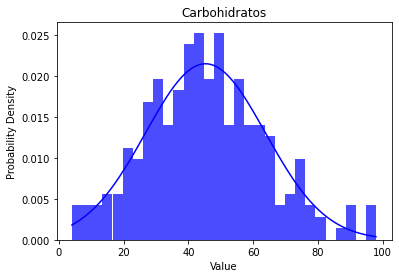

In [59]:
x = np.arange(min(df_car), max(df_car), 0.1)
serie=df_car
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos')
plt.show()

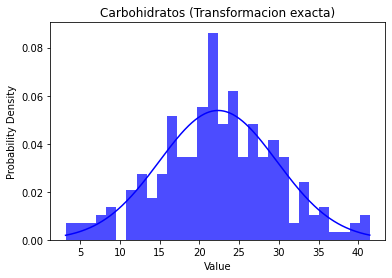

In [58]:
x = np.arange(min(yj_e_car), max(yj_e_car), 0.1)
serie=yj_e_car
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos (Transformacion exacta)')
plt.show()

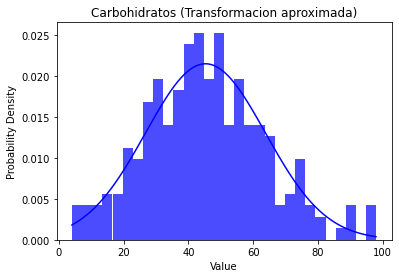

In [57]:
x = np.arange(min(yj_a_car), max(yj_a_car), 0.1)
serie=yj_a_car
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Carbohidratos (Transformacion aproximada)')
plt.show()


##### Histograma de variable Azúcares y sus tranformaciones

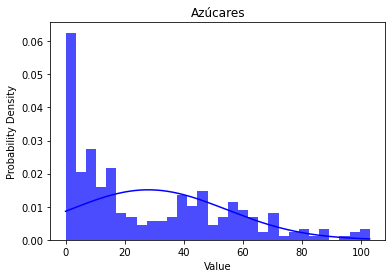

In [56]:
x = np.arange(min(df_sug), max(df_sug), 0.1)
serie=df_sug
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Azúcares')
plt.show()

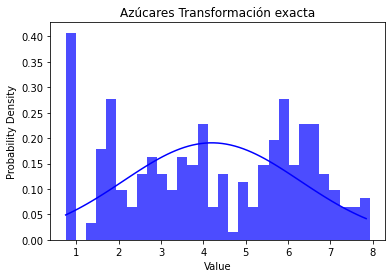

In [55]:
x = np.arange(min(yj_e_sug), max(yj_e_sug), 0.1)
serie=yj_e_sug
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Azúcares Transformación exacta')
plt.show()

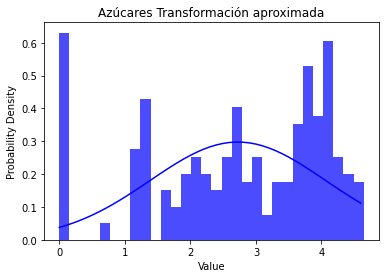

In [54]:
x = np.arange(min(yj_a_sug), max(yj_a_sug), 0.1)

serie=yj_a_sug
y = stats.norm.pdf(x, np.mean(serie), np.std(serie))
plt.figure(figsize=(6, 4))
plt.hist(serie, bins=30, density=True, histtype='bar', alpha=0.7, color='blue')
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Azúcares Transformación aproximada')
plt.show()

##### Prueba Anderson-Darling para variable Carbohidratos

In [39]:
stats.anderson(df_car,dist = 'norm')

AndersonResult(statistic=0.3963877451544704, critical_values=array([0.566, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=45.25550660792952, scale=18.58574730079311)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [40]:
stats.anderson(yj_e_car,dist = 'norm')

AndersonResult(statistic=0.2154962892213348, critical_values=array([0.566, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=22.349729138292975, scale=7.425963723929097)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [41]:
stats.anderson(yj_a_car,dist = 'norm')

AndersonResult(statistic=0.3963877451544704, critical_values=array([0.566, 0.645, 0.774, 0.903, 1.074]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=45.25550660792952, scale=18.58574730079311)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

##### Prueba Anderson-Darling para variable Azúcares

In [42]:
stats.anderson(df_sug,dist = 'norm')

AndersonResult(statistic=9.937965929358484, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=27.984375, scale=26.457804919843042)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [43]:
stats.anderson(yj_e_sug,dist = 'norm')

AndersonResult(statistic=4.124947131065255, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.198159973887773, scale=2.095178686777222)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [44]:
stats.anderson(yj_a_sug,dist = 'norm')

AndersonResult(statistic=5.979284883980199, critical_values=array([0.567, 0.646, 0.775, 0.904, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.724745363948048, scale=1.3422503386272524)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

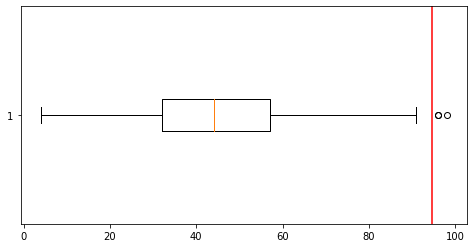

In [45]:
q1_car = np.percentile(df_car, 25)  
q3_car = np.percentile(df_car, 75)  
ri_car = q3_car - q1_car

plt.figure(figsize=(8, 4))
plt.boxplot(df_car, vert=False)
plt.axvline(x=q3_car + 1.5 * ri_car, color="red")
plt.show()

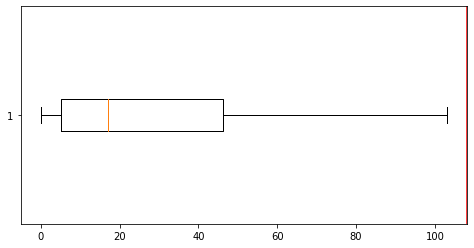

In [46]:
q1_sug = np.percentile(df_sug, 25)  
q3_sug = np.percentile(df_sug, 75)  
ri_sug = q3_sug - q1_sug

plt.figure(figsize=(8, 4))
plt.boxplot(df_sug, vert=False)
plt.axvline(x=q3_sug + 1.5 * ri_sug, color="red")
plt.show()

##### Observando los resultados las pruebas Anderson-Darling podemos aceptar a la transformación de Yeo-Johnson de la variables como aceptables ya que no podemos negar normalidad en niguno de los niveles de significancia, sin embargo podemos decir lo mismo para la transformación aproximada. Esto sumado a los histogramas se observa una similitud con la distribución teorica. Cabe destacar que para esta variable fue necesario eliminar los 0 para una mejor adaptación ala distribución normal.
##### Para la variable Azúcares no fue posible eliminar ceros ya que representaban una gran cantidad de datos en el histograma, e incluso eliminando los ceros la tendencia de los datos no parece ser normal, esto se confirma al analizar los resultados de la prueba de Anderson-Darling aplicados a la transformación Yeo-Johnson en donde podemos negar normalidad en todos los niveles de significancia incluso eliminando los valores atípicos. para esta distrubicion de datos sería posible proponer otra distribución como una chi cuadrada con 1 grado de libertad.

##### En la implementacion de las dos transformaciones es necesario tomar en cuenta algunos factores. Para la transformacion de Box-Cox es necesario que todos los datos sean positivos, es menos compleja que Yeo-Johnson pero más sensible a outliers. Yeo-Johnson por otra parte admite valores positivos y no es tan sensible a otliers, sin embargo es más compleja. 
##### Las dos transformaciones son muy similares de hecho cuando los datos de entrada sólo contienen valores positivos, la transformación de Yeo-Johnson se simplifica a la transformación de Box-Cox, lo que facilita la comparación. La decisión entre una y otra se basa en el tipo de datos con los que se trabaje. Para datos positivos, la transformación Box-Cox es directa y eficiente, mientras que la transformación Yeo-Johnson ofrece mayor flexibilidad y robustes para adaptarse a una gama más amplia de distribuciones de datos. Es posible aplicar ambas y evaluar cómo afectan a la normalidad de los datos y a los resultados del estudio.

##### Una transformación  busca cambiar la distribución de los datos de una variable, esto afecta el comportamiento de la variable así como sus variables afectando los estadísticos de esta varibale. Un escalamiento no cambia la distribución de probabilidad de la variable si no las magnitudes de la variable, los estadísticos de esta variable se verán afectados solo en un cambio de magnitud. La principal diferencia entre una transformación de datos y un escalamiento es el proposito que tienen. 

##### En un contexto de machine learning la transformación busca la modificación de la distribución de los datos mientras que poder comparar variables con diferentes escala, la transformacion debe ser utilizada para un analísis estadístico de la variable para crear variables nuevas y determinar si su comportamiento puede generalizar información sobre la muestra, un escalamiento se utiliza para compensar diferencias en magnitudes de las variables para facilitar el proceso de aprendizaje de un modelo